### [Микроперепись населения - 2015](https://gks.ru/free_doc/new_site/population/demo/micro-perepis/finish/micro-perepis.html)  
#### 1.2. [Население, принявшее участие в микропереписи, по полу, возрастным группам и состоянию в браке (супружеском союзе)](https://gks.ru/free_doc/new_site/population/demo/micro-perepis/finish/01/01-02_(%D0%B0%D0%B1%D1%81).xlsx)
Данные предварительно упрощены для машинного анализа (удалены агрегированные показатели по округам, областям и т.д.)

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
census = pd.read_excel("https://github.com/tadoran/netology_pyda/blob/master/Population%D0%A1ensus2015.xlsx?raw=true")
census["Divorced"] = census["OfficiallyDivorced"] + census["NonOfficialylDivorced"]
census.head()

,FederalDistrict,Region,CityOrRural,Gender,AgeGroup,TotalRespondents,AnsweredAboutMarriage,DeclinedAbotMarriage,InMarriage,InOfficialMarriage,InNonOfficialMarriage,NeverMarried,OfficiallyDivorced,NonOfficialylDivorced,Widow,Divorced
0,Центральный,Белгородская область,Городское население,Мужчины,16 – 17,144,143,1.0,3.0,3.0,NaN,140.0,NaN,NaN,NaN,NaN
1,Центральный,Белгородская область,Городское население,Мужчины,18 – 19,135,135,NaN,5.0,3.0,2.0,129.0,NaN,1.0,NaN,NaN
2,Центральный,Белгородская область,Городское население,Мужчины,20 – 24,531,531,NaN,115.0,72.0,43.0,411.0,4.0,1.0,NaN,5.0
3,Центральный,Белгородская область,Городское население,Мужчины,25 – 29,725,725,NaN,435.0,367.0,68.0,255.0,23.0,12.0,NaN,35.0
4,Центральный,Белгородская область,Городское население,Мужчины,30 – 34,684,684,NaN,501.0,451.0,50.0,103.0,60.0,18.0,2.0,78.0


In [3]:
by_gender_age = census.pivot_table(columns=["Gender"], index = ["AgeGroup"], 
                                   values="TotalRespondents", aggfunc="sum")
by_gender_age.T

AgeGroup,до 16,16 – 17,18 – 19,20 – 24,25 – 29,30 – 34,35 – 39,40 – 44,45 – 49,50 – 59,60 – 69,70 – 79,>= 80
Gender,,,,,,,,,,,,,
Женщины,32,20394,19650,62335,91815,90924,87902,83339,76857,198543,169670,102094,55077
Мужчины,32,21280,18625,59827,89738,87215,78813,72834,67158,154459,111533,43843,16710


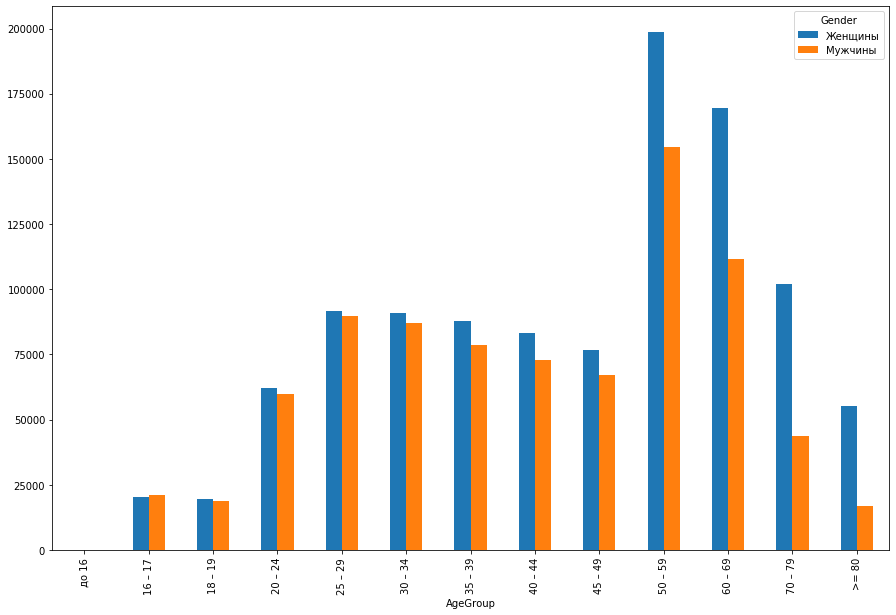

In [4]:
by_gender_age.plot(kind="bar", figsize=(15, 10))
plt.show()

В графике представлены категориальные переменные - пол, возрастная группа.
По графику видно, что в старших возрастных группах, количество мужчин сокращается.
Большое количество респондентов в возрастных группах 50+ может также свидетельствовать об особенности сбора данных в сете (вероятно опрос проводился поквартирным обходом днем, когда многие люди работают).

In [5]:
by_district_age = census.pivot_table(columns="Gender", index=["AgeGroup"], values="TotalRespondents", aggfunc="sum", fill_value = 0).applymap(int)
by_district_age["FtM_Ratio"] = (by_district_age["Женщины"] / by_district_age["Мужчины"])-1
by_district_age.reset_index(inplace=True)
by_district_age.head()

Gender,AgeGroup,Женщины,Мужчины,FtM_Ratio
0,до 16,32,32,0.000000
1,16 – 17,20394,21280,-0.041635
2,18 – 19,19650,18625,0.055034
3,20 – 24,62335,59827,0.041921
4,25 – 29,91815,89738,0.023145


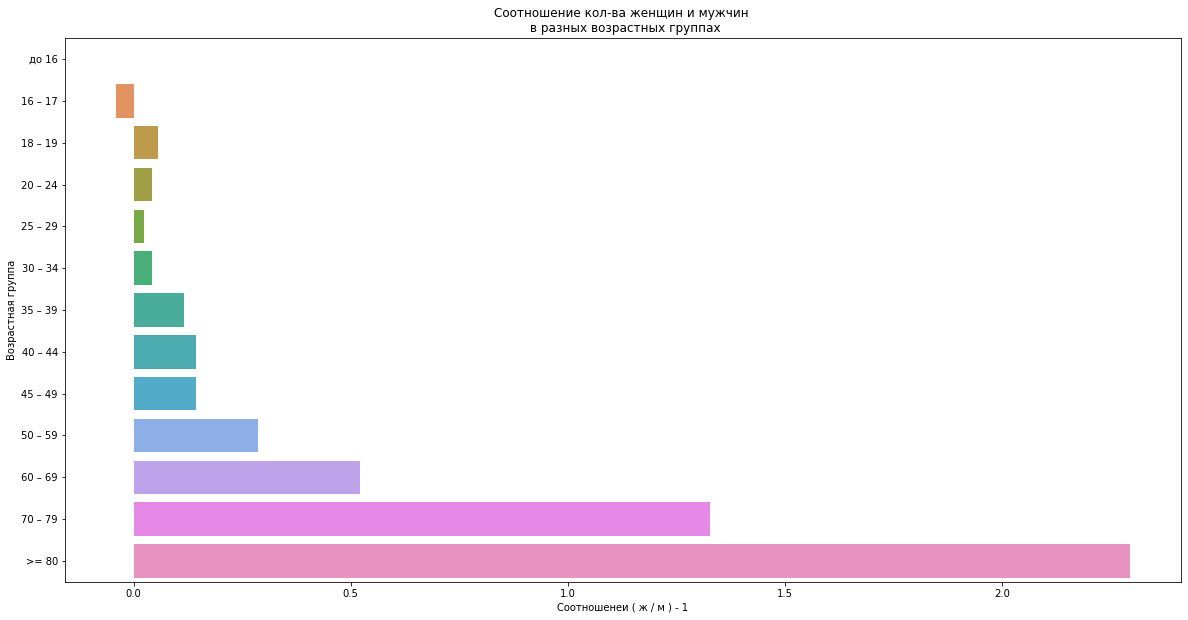

In [6]:
plt.figure(figsize=(20,10))
g = sns.barplot(y="AgeGroup", x="FtM_Ratio", data=by_district_age)
g.set_title("Соотношение кол-ва женщин и мужчин \n в разных возрастных группах")
g.set(xlabel='Соотношенеи ( ж / м ) - 1', ylabel="Возрастная группа")
plt.show()

На графике показано соотношение женского и мужского населения в зависимости от вохрастной группы.  Видно, что количество женщин в старших возрастных группах больше почти в два раза.
В графике участвуют переменные возрастная группа (категориальная переменная), и FtM_Ratio (соотношение кол-ва женщин к мужчинам).  
Задача графика - продемонстрировать неравномерность распределения в разных возрастных группах.


In [12]:
heat_map = census.groupby(["AgeGroup","CityOrRural"]).sum().loc[:,["NeverMarried","InMarriage","Divorced","Widow"]].dropna()
heat_map.head()

NeverMarried  InMarriage  Divorced  Widow
AgeGroup CityOrRural                                                   
 до 16   Городское население           0.0        50.0       0.0    0.0
         Сельское население            0.0        11.0       0.0    0.0
16 – 17  Городское население       26033.0       472.0       2.0    6.0
         Сельское население        14515.0       268.0       0.0    4.0
18 – 19  Городское население       23358.0      2372.0      19.0   11.0

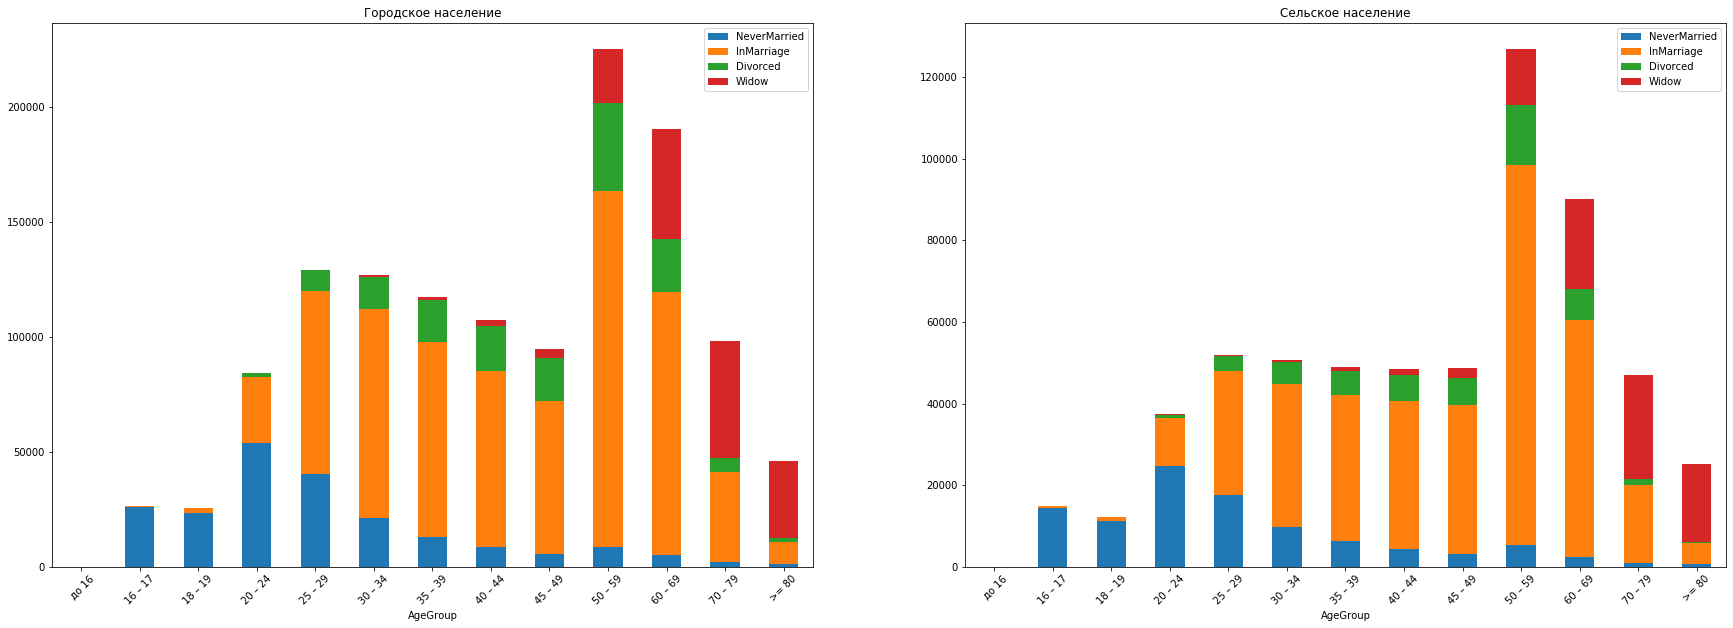

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30, 10), sharex=True, sharey=False)
population_ = heat_map.reset_index().groupby(["AgeGroup","CityOrRural"]).sum().reset_index()
city_population  = population_[ population_["CityOrRural"] == "Городское население" ].groupby("AgeGroup").sum()
rural_population = population_[ population_["CityOrRural"] == "Сельское население"  ].groupby("AgeGroup").sum()

city_population.plot(kind= 'bar', rot=45, stacked=True, orientation="vertical", ax=axes[0], title="Городское население")
rural_population.plot(kind='bar', rot=45, stacked=True, orientation="vertical", ax=axes[1], title="Сельское население" )
plt.show()

На графике представлены данные о семейном положении респондентов в зависимости от возрастной группы отдельно для городского и сельского населения.  
В исходных данных возрастные категории возрастов предопрелены - можно либо их экстраполировать, либо использовать как категориальные (что и сделано).
Можно увидеть, что количество респондентов, которые еще не были в браке максимально в возрасте до 24 лет. В дальнейшем количество респондентов в браке выше, чем в нем не состоящих.
В старшей возрастной группе растет количество вдов и вдовцов. В итоге, в возрастной группе 80+ более половины респондентов пережили своих супругов.

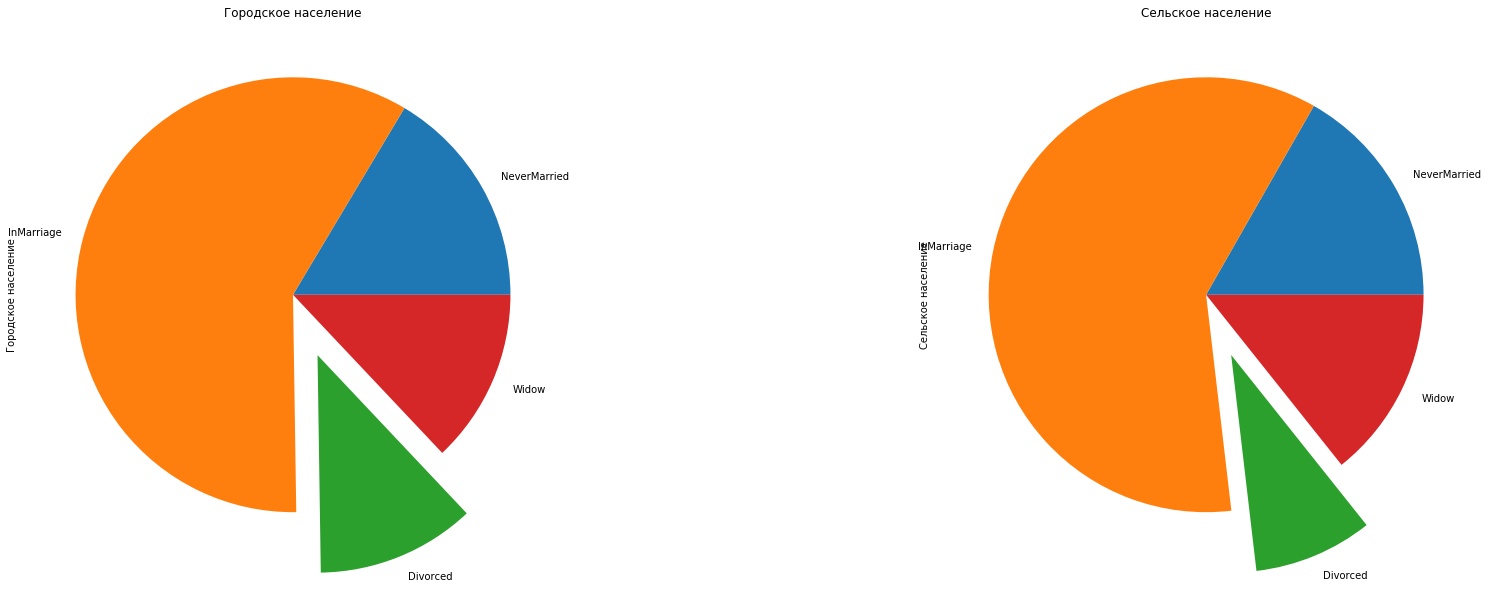

In [9]:
marital_status = heat_map.groupby('CityOrRural').sum()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30, 10), sharex=True)
marital_status.loc["Городское население"].plot(kind='pie', ax=axes[0], title="Городское население", explode=[0,0,0.3,0])
marital_status.loc[ "Сельское население"].plot(kind='pie', ax=axes[1], title="Сельское население" , explode=[0,0,0.3,0])
plt.show()

На графике приведены данные о семейном положении в зависимости от возрастной группы - отдельно для городского и сельского населения. Видно, что данные по семейному статусу похожи в обеих группах.  
В то же время, количество разведенных респондентов несколько ниже в группе сельского населения.  
*(Понимаю, что это - типичный антипример использования круговой диаграммы, но на мой взгляд, тут он, все же, уместен. Мы демонстрируем что выборка похожа, но **чуть-чуть** отличается по 1 параметру)*




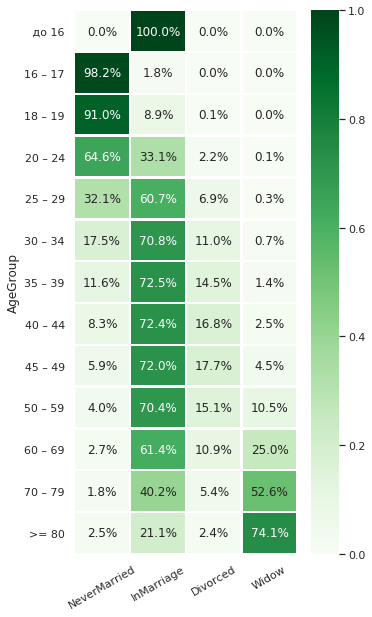

In [10]:
sns.set()

columns_order = ["NeverMarried", "InMarriage", "Divorced", "Widow"]
# % статуса брака от всех в каждой возрастной группе
status_percent = census.pivot_table(index="AgeGroup", values=columns_order, aggfunc="sum").apply(lambda x: x / sum(x), axis=1).reindex(columns_order, axis=1)

# Heatmap с подписями данных по центру
f, ax = plt.subplots(figsize=(5, 10))
sns.heatmap(status_percent, annot=True, fmt="2.1%", linewidths=1.5, ax=ax, cmap="Greens")
plt.yticks(rotation=0)
plt.xticks(rotation=30)

# A dirty hack from https://github.com/mwaskom/seaborn/issues/1773#issuecomment-546466986
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

На данном графике представлена тепловая карта с самым распространенным семейным статусом для каждой возрастной группы.
Видно, что в группах до 25 лет превалирует статус "не замужем / не женат". Исключение - лишь у группы до 16 лет (данный датасет собирался по людям старше 16 лет; попали в выборку лишь те респонденты младше 16, которые состояли в браке).  
Количество респондентов в браке составляет ок. 70% в возрастах 30 - 60 лет.  
Количество разведенных респондентов достигает пика (ок. 18% в группе 40-44 года).  
Количество вдовцов растет группах от 50 лет, увеличиваясь в каждой следующей возрастной группе.

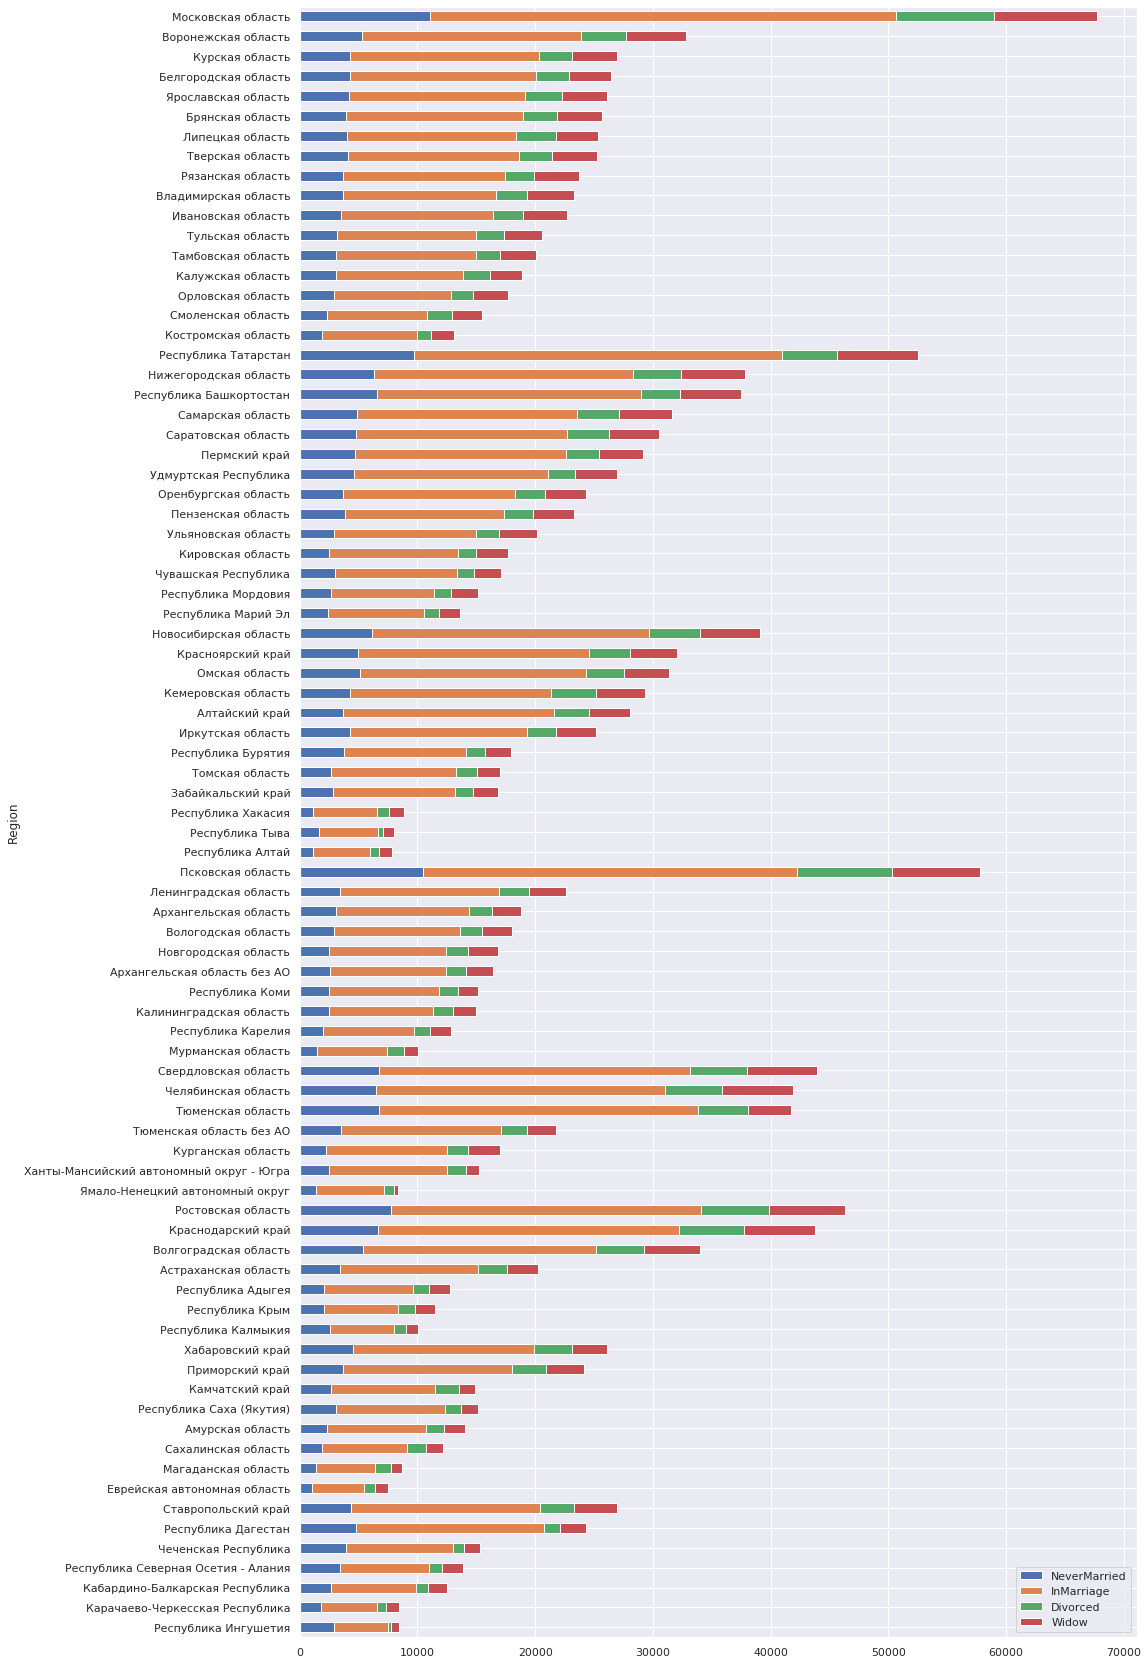

In [11]:
# Численность респондентов по фед. округам
fed_dis = census.groupby("FederalDistrict").sum().sort_values(by="TotalRespondents", ascending=False).sum(axis=1)

# Сортируем данные по численности в регионе, потом по численности в области
sortedDf = census.groupby(["FederalDistrict","Region"]).sum().join(fed_dis.rename('FedDisrPopul')).sort_values(by=["FedDisrPopul","TotalRespondents"])

# Составим dataframe c семейным статусом по каждой области, и выведем огромным полотном =)
marial_by_region = sortedDf.droplevel(0).loc[: , columns_order]
marial_by_region.plot(kind="barh", figsize=(15,30), stacked=True)
plt.show()

На этом длинном графике можно посмотреть данные по всем регионам чтобы поискать идеи для дальнейшей проверки.  
Например, кол-во разводов в Дагестанской, Чеченской, Ингушской республиках (а так же внезапно, в респ. Тыва) - ниже среднего по выборке. Из этого можно сделать предположение, например, о социальной неприемлимости разводов *(гипотеза требует более глубокой проверки).*